In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
data_dir='C:/Users/anparash/Desktop/Nokia_ML/Decision_Tree'

In [4]:
os.chdir(data_dir)

In [5]:
hr_data=pd.read_csv('hr.csv')

In [6]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [8]:
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [9]:
hr_data['sales'].unique().tolist()

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

In [10]:
hr_data.rename(columns={'sales':'dept'},inplace=True)

In [11]:
hr_data['salary'].head()

0       low
1    medium
2    medium
3       low
4       low
Name: salary, dtype: object

In [12]:
X=hr_data.drop('left',axis=1)
y=hr_data['left']

In [13]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [14]:
X=pd.get_dummies(X)

In [15]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
clf=GradientBoostingClassifier(n_estimators=80,random_state=400)

In [20]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=80, presort='auto', random_state=400,
              subsample=1.0, verbose=0, warm_start=False)

In [21]:
clf.score(X_test,y_test)

0.97399999999999998

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
mod=GridSearchCV(clf,param_grid={'n_estimators':[60,80,100,120,140,160]})
mod.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=80, presort='auto', random_state=400,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [60, 80, 100, 120, 140, 160]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [24]:
mod.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=160, presort='auto', random_state=400,
              subsample=1.0, verbose=0, warm_start=False)

In [24]:
clf=GradientBoostingClassifier(n_estimators=160,random_state=400)
clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=160,
              presort='auto', random_state=400, subsample=1.0, verbose=0,
              warm_start=False)

In [25]:
clf.score(X_test,y_test)

0.97399999999999998

In [26]:
clf.feature_importances_

array([  3.20065629e-01,   1.31637925e-01,   1.79849068e-01,
         1.32597549e-01,   1.84084454e-01,   1.78713936e-02,
         0.00000000e+00,   1.61868113e-03,   3.61354044e-05,
         0.00000000e+00,   0.00000000e+00,   1.95467466e-04,
         0.00000000e+00,   0.00000000e+00,   2.44660642e-05,
         0.00000000e+00,   4.50932342e-03,   1.25011339e-02,
         1.50087749e-02,   0.00000000e+00])

In [27]:
feature_imp=pd.Series(clf.feature_importances_,index=X.columns)
feature_imp.sort_values(ascending=False)

satisfaction_level       0.320066
time_spend_company       0.184084
number_project           0.179849
average_montly_hours     0.132598
last_evaluation          0.131638
Work_accident            0.017871
salary_low               0.015009
salary_high              0.012501
dept_technical           0.004509
dept_IT                  0.001619
dept_management          0.000195
dept_RandD               0.000036
dept_sales               0.000024
salary_medium            0.000000
promotion_last_5years    0.000000
dept_hr                  0.000000
dept_marketing           0.000000
dept_product_mng         0.000000
dept_support             0.000000
dept_accounting          0.000000
dtype: float64

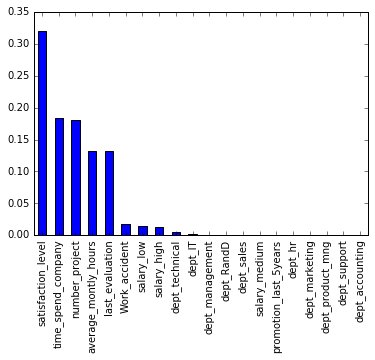

In [28]:
feature_imp.sort_values(ascending=False).plot(kind='bar')

In [29]:
##Partial Dependence Plot
from sklearn.ensemble.partial_dependence import plot_partial_dependence

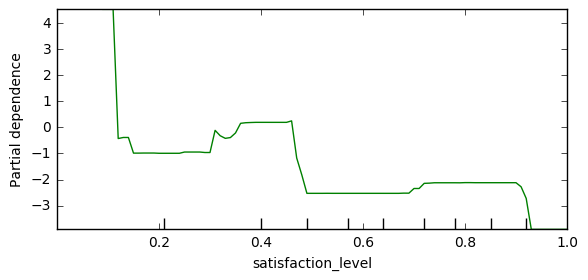

In [30]:
fig,axs=plot_partial_dependence(clf, X, [0],feature_names=X.columns.tolist())